# Advanced Regression Surprise Housing Assignment

Submitted by Kumar Krishna Chakraborty

# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:
- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.
 
 

Also, determine the optimal value of lambda for ridge and lasso regression.

# Business Goal

- Build a regression model using advanced regression methods like Ridge and Lasso regression to predict the price of houses with the available independent variables.
- This model will then be used by the management to understand how exactly the prices vary with the variables.
- The management can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.
- The model will be a good way for management to understand the pricing dynamics of a new market.

# Key Model Objective

- Which variables are significant in predicting the price of a house.
- How well those variables describe the price of a house.
- Determine the optimal value of lambda for ridge and lasso regression.

# Reading and Understanding the Data

In [1]:
# We supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# We import the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error

from scipy import stats
from scipy.stats import norm, skew 

In [3]:
# We set display limits
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

As per data descripion file, there are few categorical columns where NA has special meaning. So, we will have to replace these by 'None' before finding missing values. For this we will read the csv file by setting the parameter 'keep_default_na' to False 

In [4]:
## We prevent 'NA' to be read as 'NaN' by pandas
house_df = pd.read_csv('train.csv', keep_default_na=False)
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [5]:
## We replace all 'NA' values for the specific categorical columns with 'None'
house_df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']] = house_df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].replace("NA", "None")
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


In [6]:
# We check the shape of the dataset
house_df.shape

(1460, 81)

In [7]:
# We analyse the descriptive insights of the dataframe 
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

By looking at the data types of columns and comparing with data description sheet, we feel that the data types of the following columns need to be changed
- MSSubClass need to be converted to object type.
- LotFrontage and MasVnrArea needs to be converted to numeric type.

In [8]:
## We convert the column to 'object' type as mentioned above

house_df[['MSSubClass']] = house_df[['MSSubClass']].astype('object')

In [9]:
# We convert the two columns to 'numeric' type as mentioned above
house_df['LotFrontage'] = pd.to_numeric(house_df['LotFrontage'], errors='coerce')
house_df['MasVnrArea'] = pd.to_numeric(house_df['MasVnrArea'], errors='coerce')


In [10]:
## We verify the data types of the three columns
house_df[['MSSubClass', 'LotFrontage', 'MasVnrArea']].dtypes

MSSubClass      object
LotFrontage    float64
MasVnrArea     float64
dtype: object

In [11]:
# Check for any duplicate entries
house_df.duplicated().sum()

0

In [12]:
#We check the description 
house_df.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### The mean of few variables like 2ndFlrSF are very different from their median values, so they have skewed distributions.

In [13]:
## We check for missing values
house_df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

#### The columns LotFrontage and MasVnrArea contain missing values. We will perform missing value treatment on them.

# Data Exploration

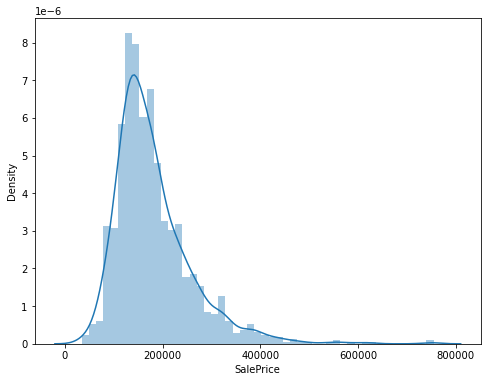

In [14]:
## We analyse the target variable 'SalePrice'
plt.figure(figsize=[8,6])
sns.distplot(house_df['SalePrice']);

In [15]:
# We check the skewness of target variable
house_df['SalePrice'].skew()

1.8828757597682129

#### The skewness is greater than 1. Hence we infer that target variable is highly skewed

In [16]:
# We check the kurtosis of target variable
house_df['SalePrice'].kurt()

6.536281860064529

- The kurtosis is greater than 1. Hence the distribution of target variable is highly peaked.
- We will apply log transformation to our target variable

In [17]:
# We apply Log transformation to the target variable
house_df['SalePrice'] = np.log(house_df['SalePrice'])

In [18]:
# We verify the skewness of target variable now
house_df['SalePrice'].skew()

0.12133506220520406

In [19]:
# We verify the kurtosis of target variable now
house_df['SalePrice'].kurt()

0.8095319958036296

#### We now observe that both Skewness and Kurtosis are below 1 

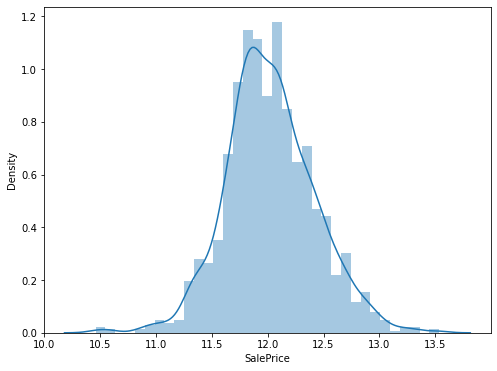

In [20]:
# We plot the spread of target variable now
plt.figure(figsize=[8,6])
sns.distplot(house_df['SalePrice']);

#### We observe that our target variable is normally distributed

We now isolate the numerical and categorical columns for further analysis

In [21]:
# We isolate the numerical columns
housedf_num = house_df.select_dtypes(include=['int64', 'float64'])
housedf_num.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,12.247694
1,2,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,12.109011
2,3,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,12.317167
3,4,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,11.849398
4,5,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,12.429216


In [22]:
# We isolate the categorical columns
housedf_cat = house_df.select_dtypes(include='object')
housedf_cat.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,2003,RFn,TA,TA,Y,None,None,None,WD,Normal
1,20,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,1976,RFn,TA,TA,Y,None,None,None,WD,Normal
2,60,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2001,RFn,TA,TA,Y,None,None,None,WD,Normal
3,70,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,1998,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,60,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2000,RFn,TA,TA,Y,None,None,None,WD,Normal


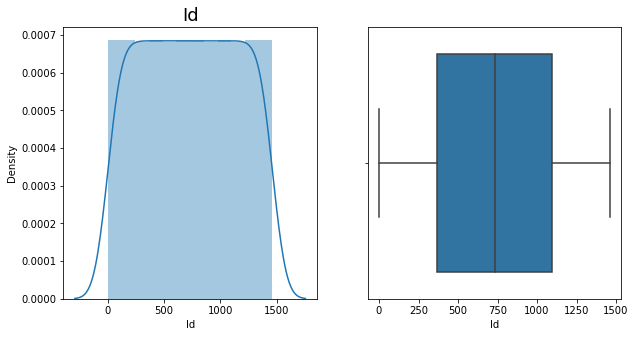

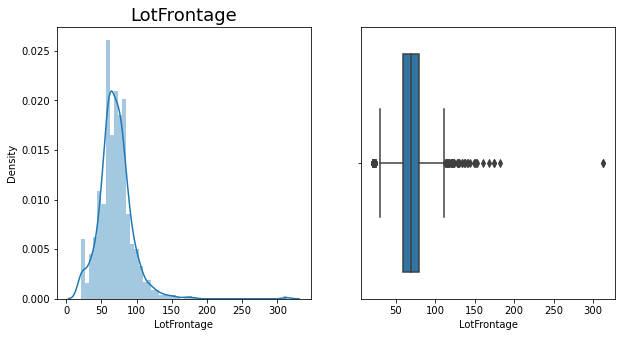

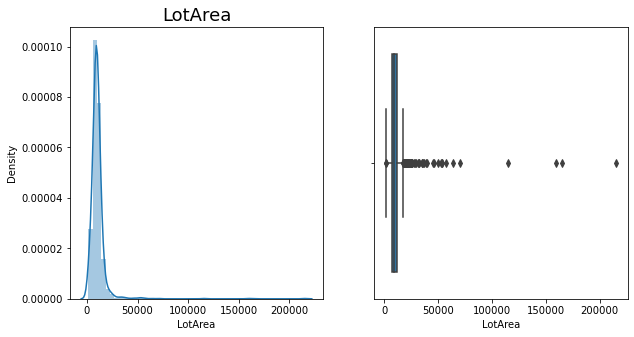

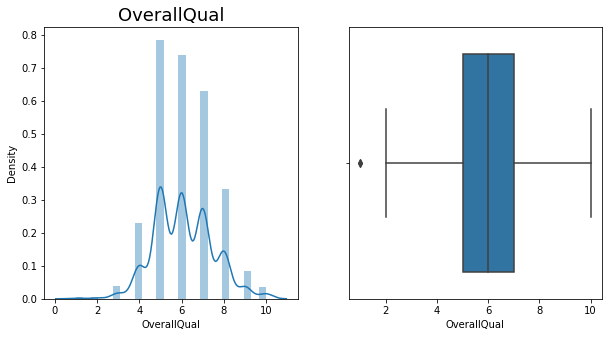

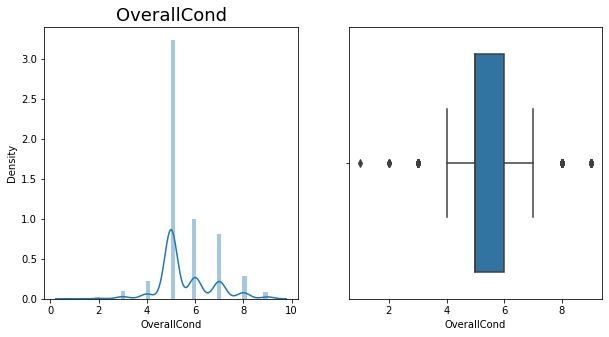

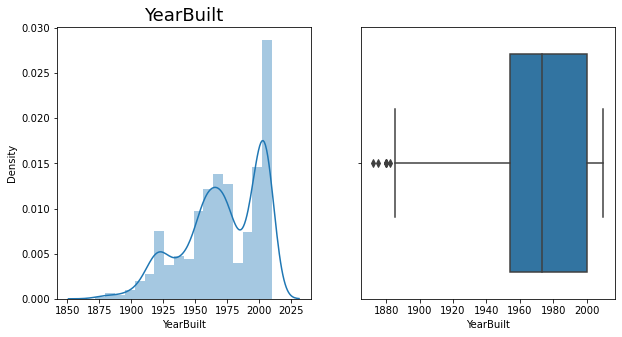

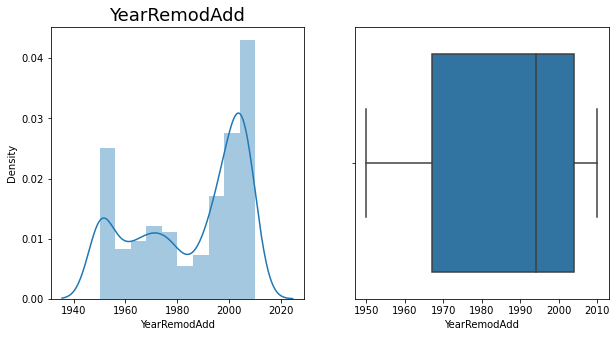

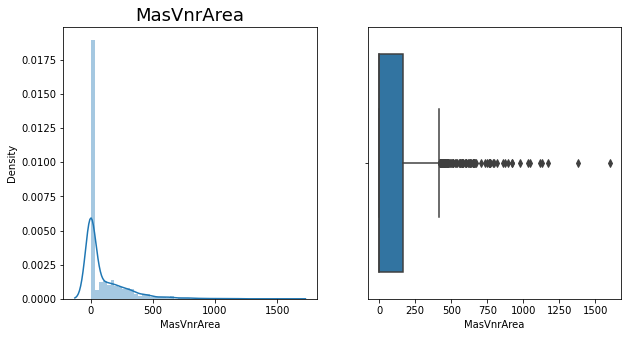

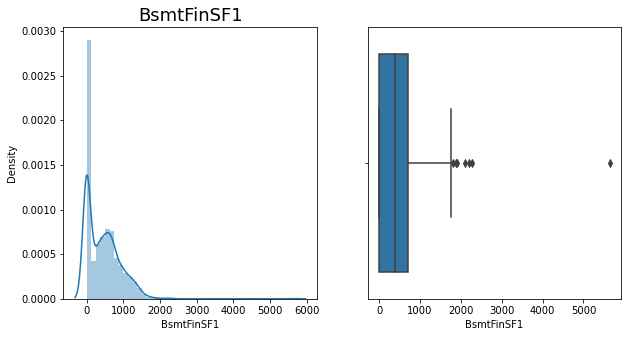

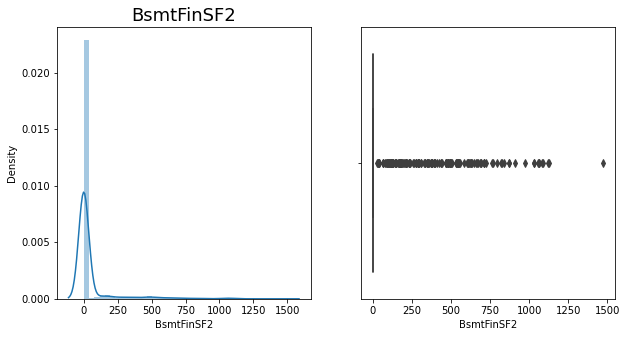

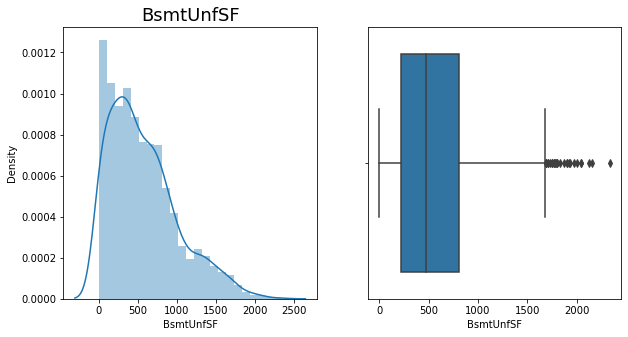

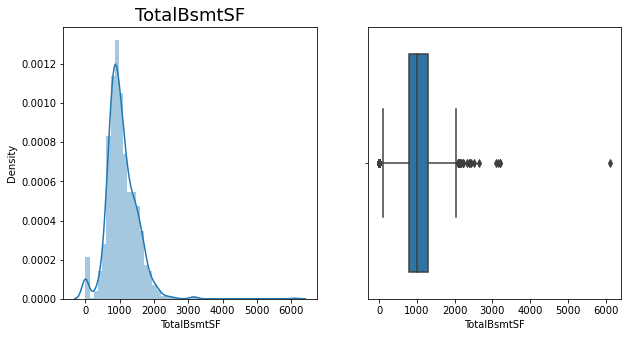

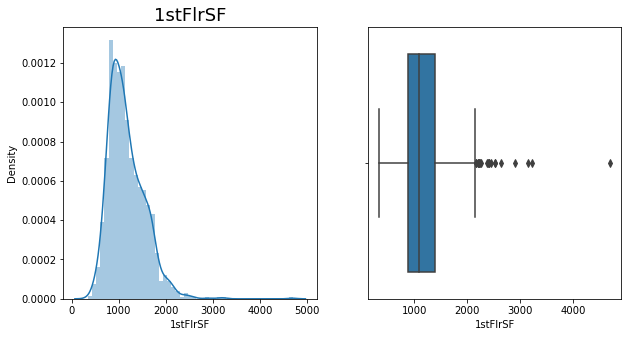

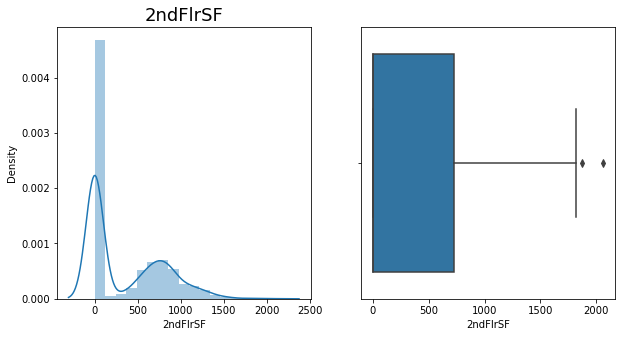

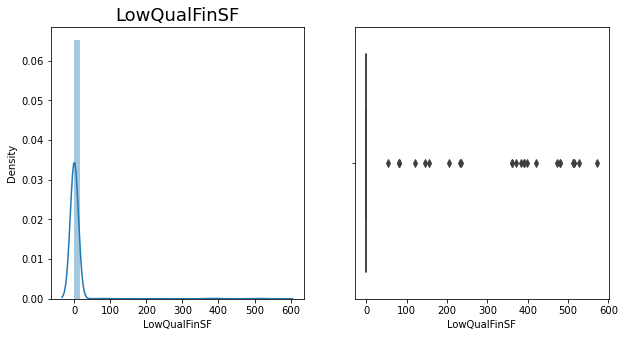

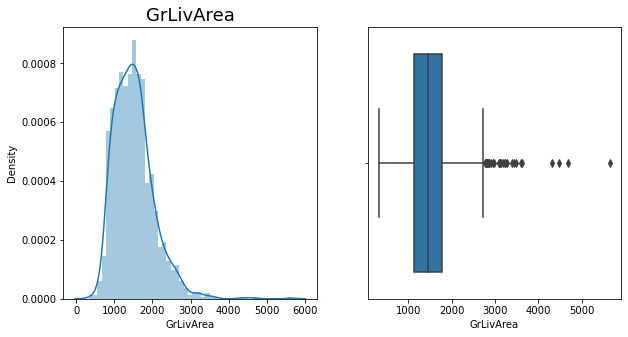

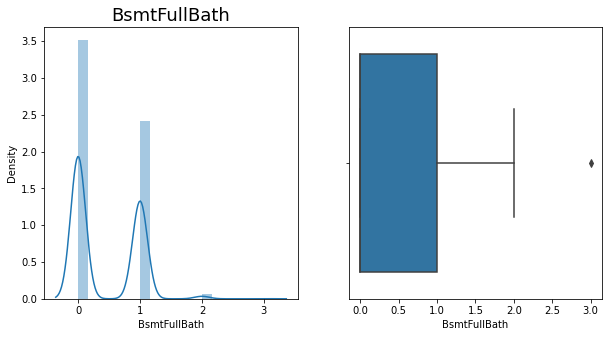

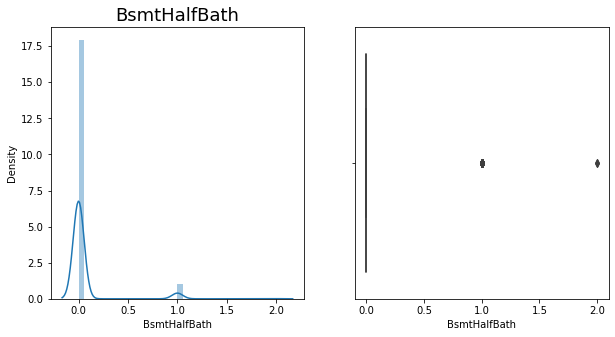

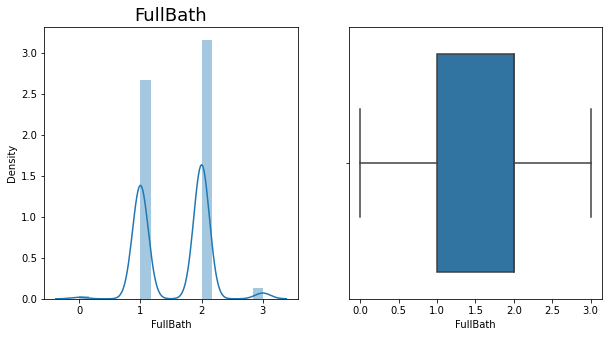

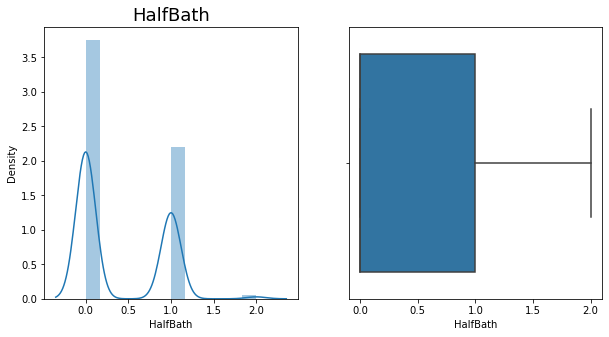

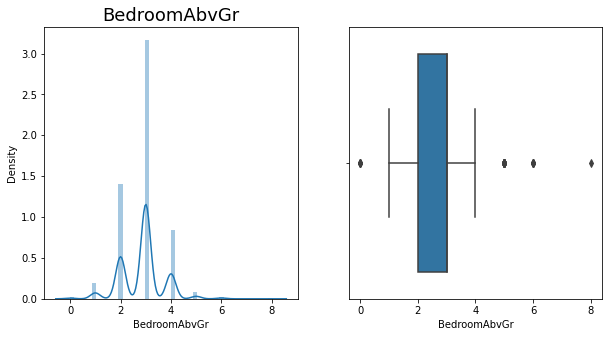

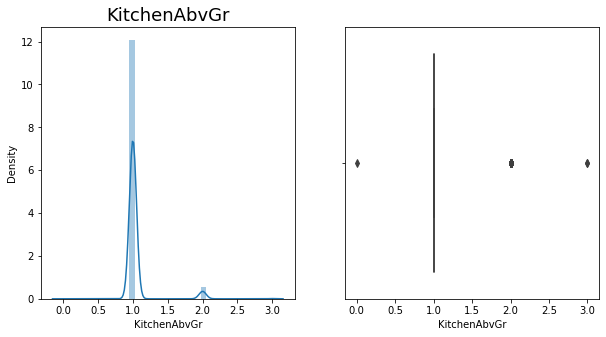

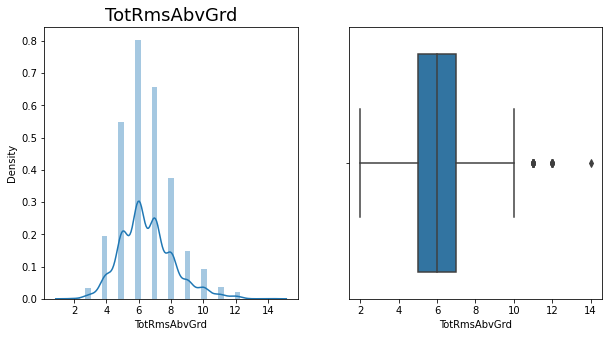

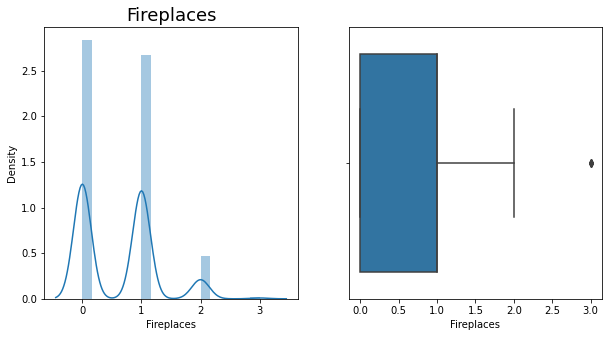

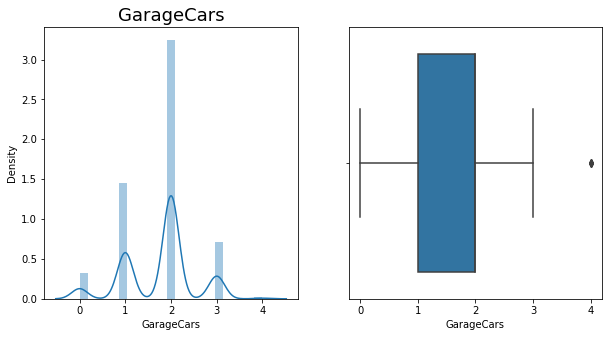

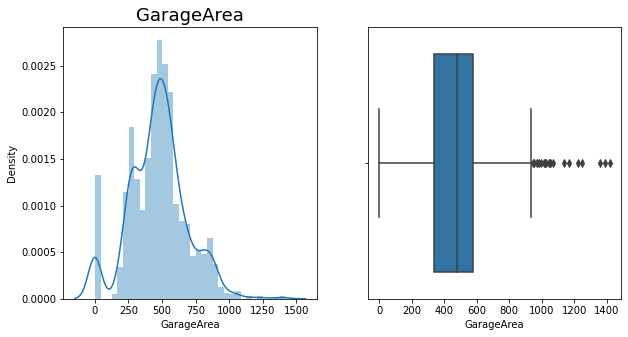

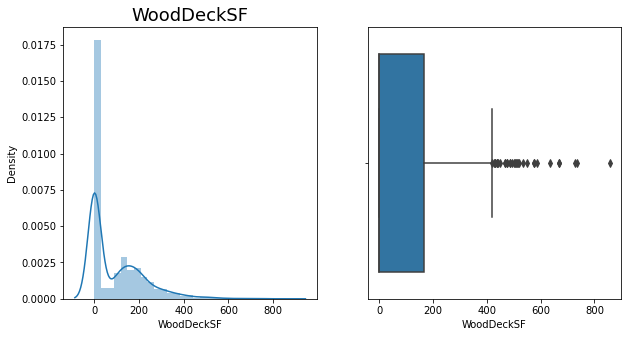

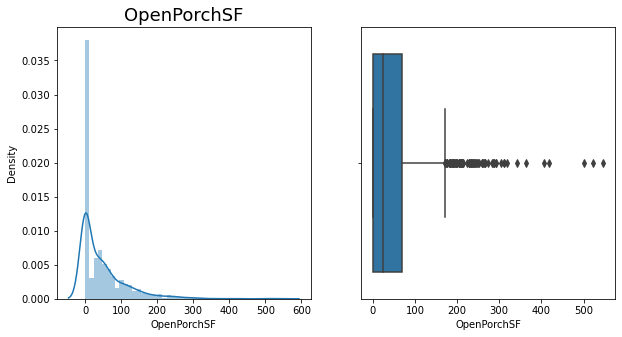

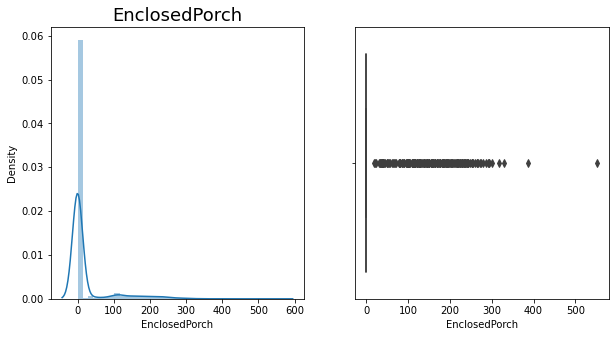

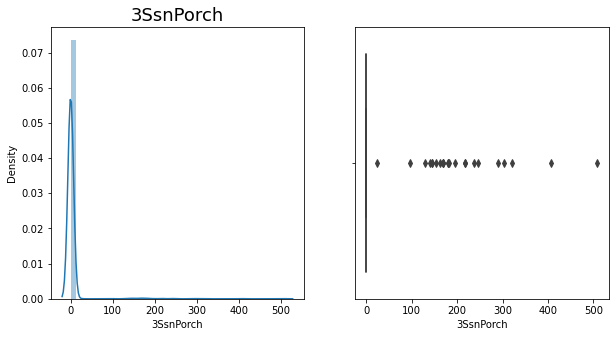

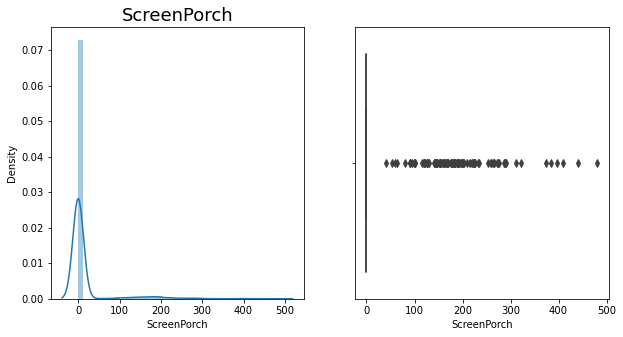

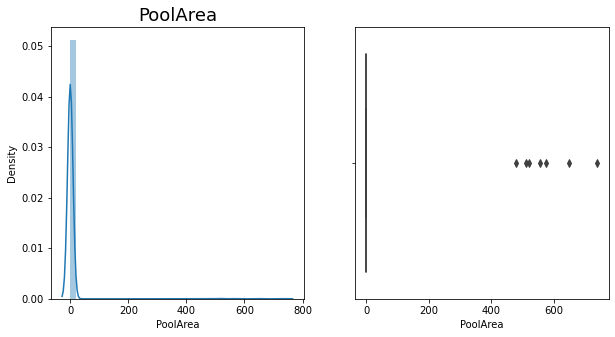

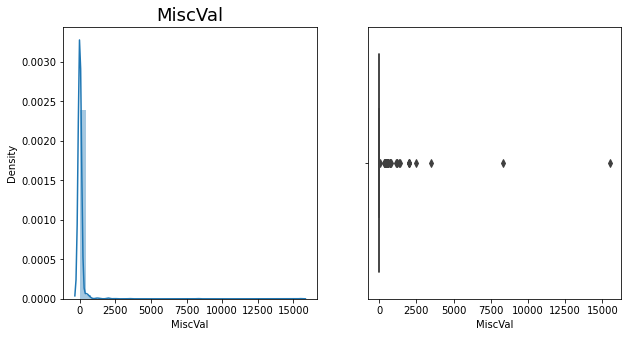

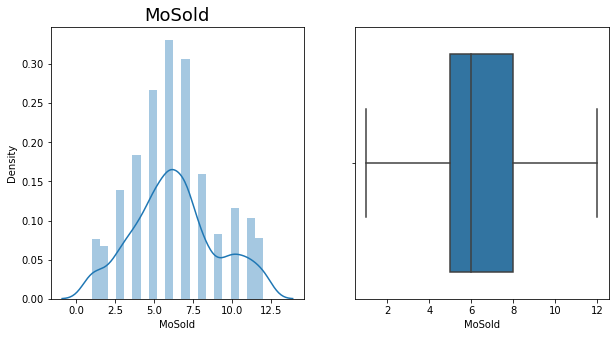

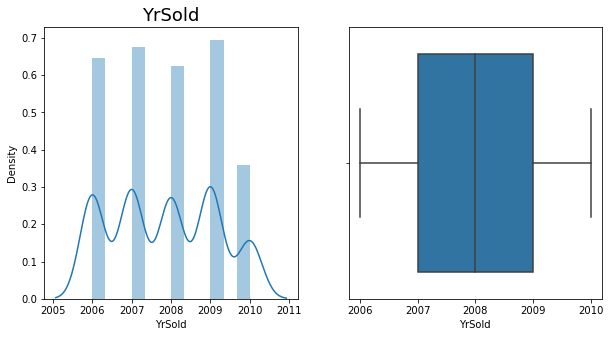

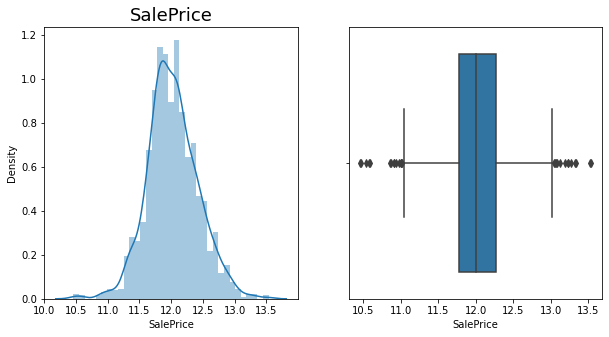

In [23]:
# We visualize the distribution of the numeric variables using histograms and boxplots
for i in housedf_num.columns:
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.title(i, fontdict={'fontsize': 18})
    sns.distplot(housedf_num[i])
    plt.subplot(1,2,2)
    sns.boxplot(housedf_num[i])
    plt.show()   

- For many numerical columns the data is not normally distributed
- Most of the numerical columns contain outliers. Hence outlier treatment is necessary

In [24]:
## We look at the unique values of all categorical columns
for i in housedf_cat.columns:
    print(i)
    print(house_df[i].unique(), '\n')

MSSubClass
[60 20 70 50 190 45 90 120 30 85 80 160 75 180 40] 

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH'] 

Street
['Pave' 'Grvl'] 

Alley
['None' 'Grvl' 'Pave'] 

LotShape
['Reg' 'IR1' 'IR2' 'IR3'] 

LandContour
['Lvl' 'Bnk' 'Low' 'HLS'] 

Utilities
['AllPub' 'NoSeWa'] 

LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

LandSlope
['Gtl' 'Mod' 'Sev'] 

Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 

Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 

Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 

BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 

HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 

RoofStyle
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed'] 

RoofMatl
['CompShg' 'WdS

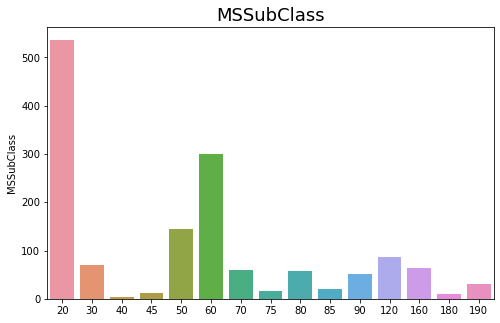

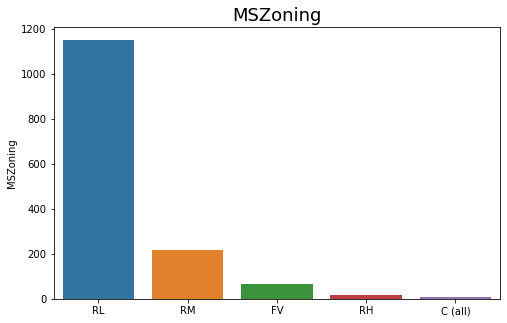

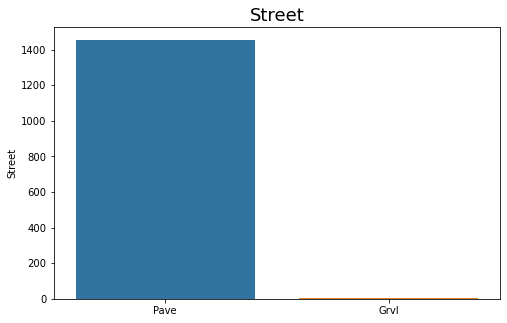

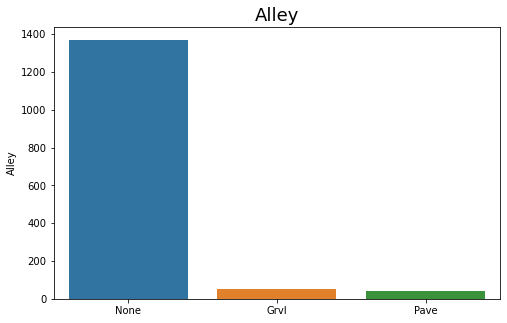

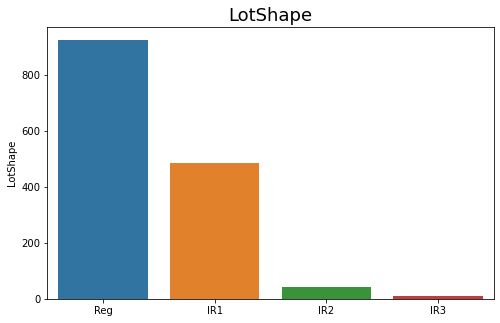

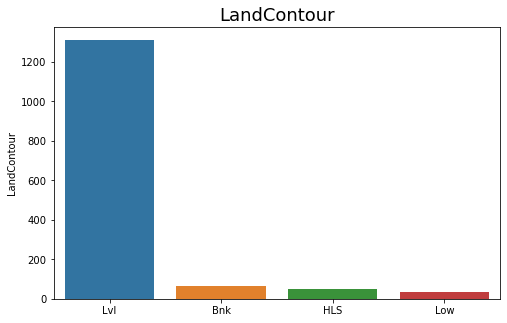

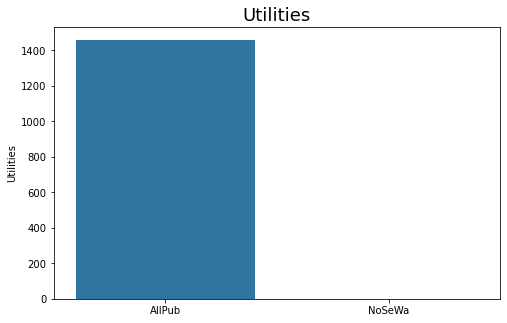

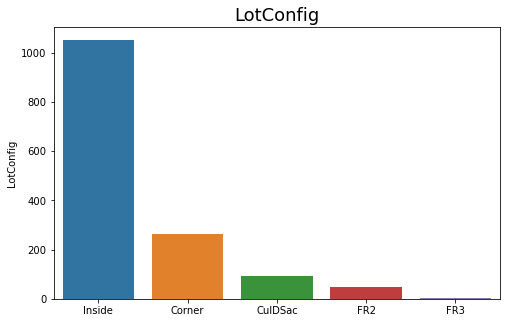

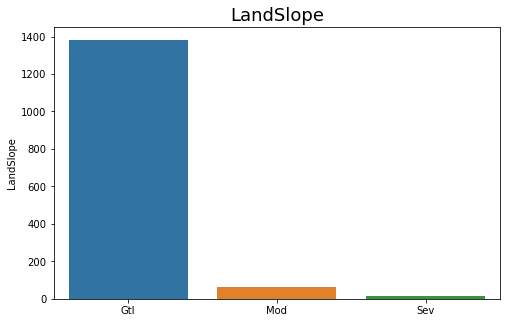

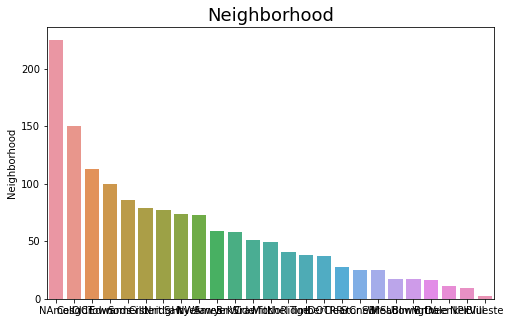

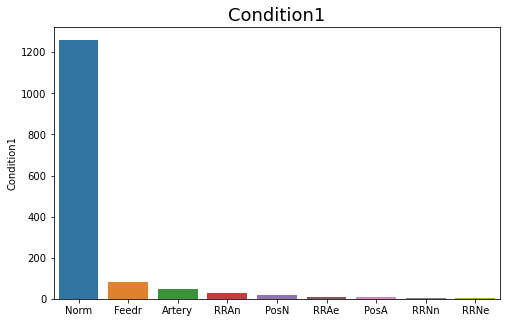

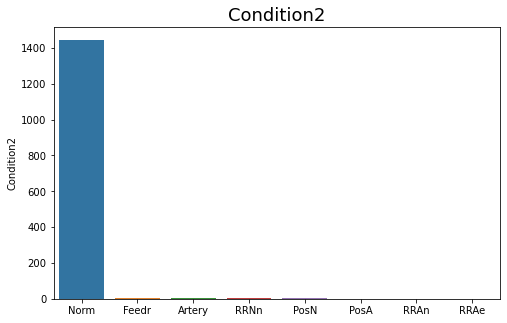

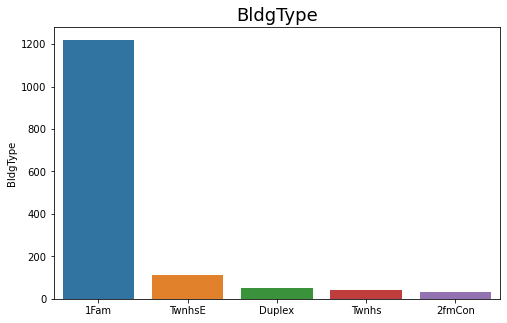

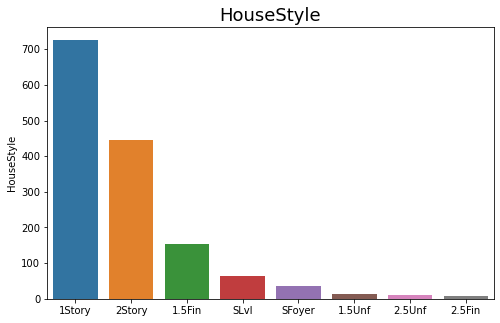

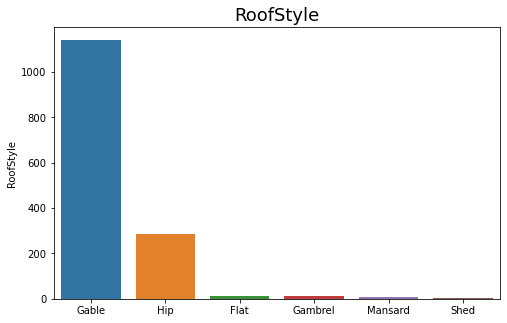

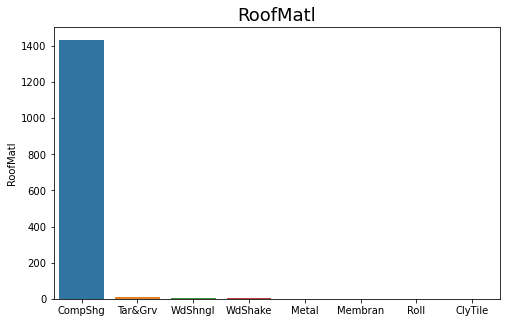

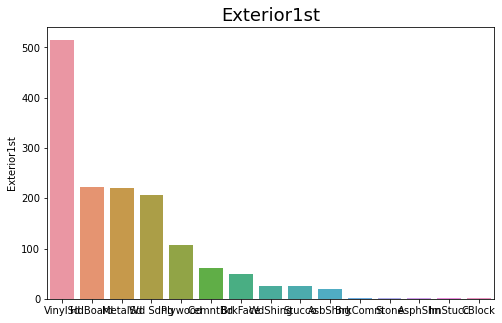

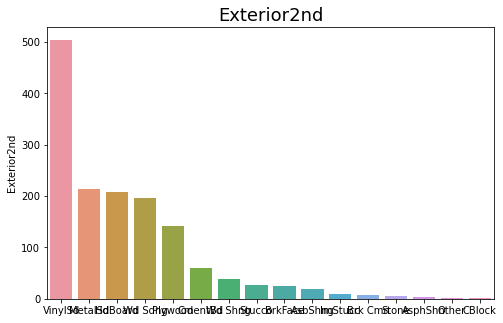

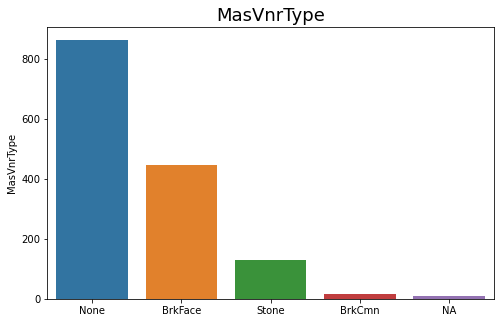

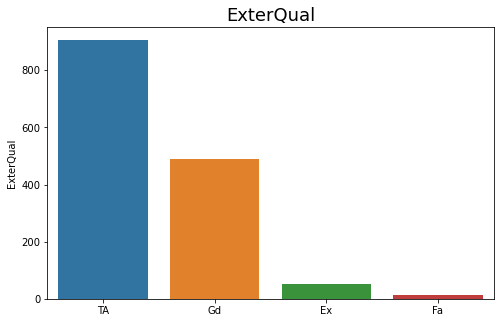

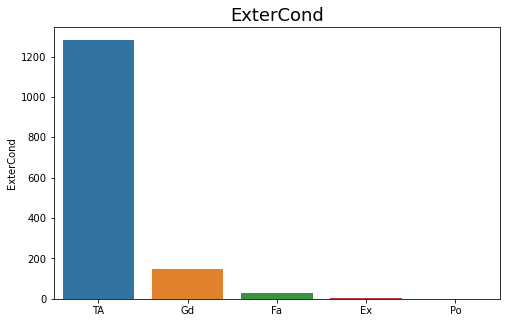

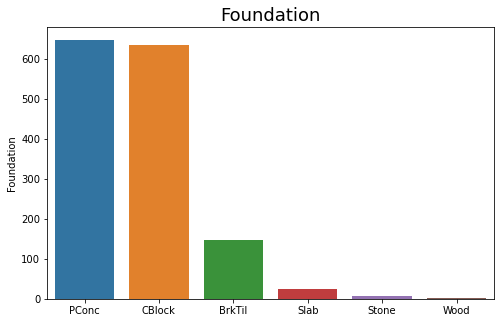

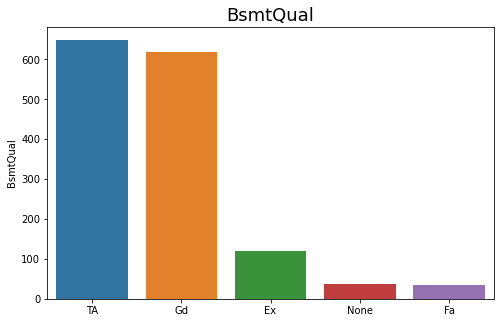

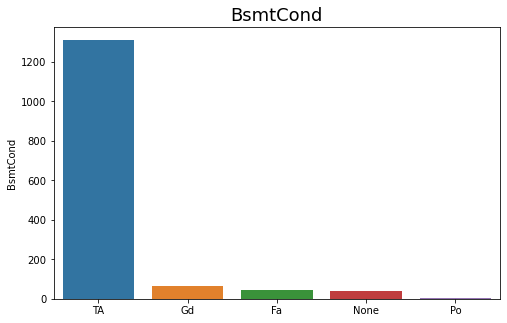

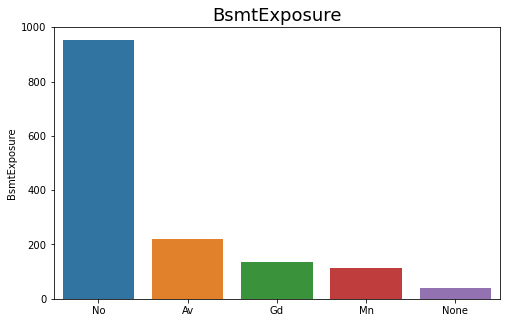

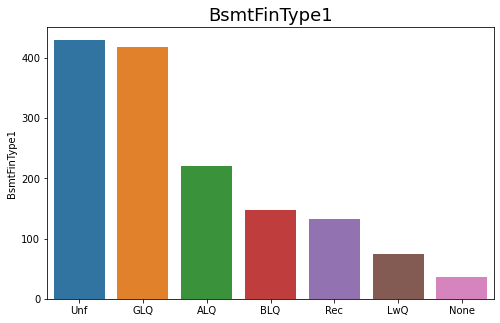

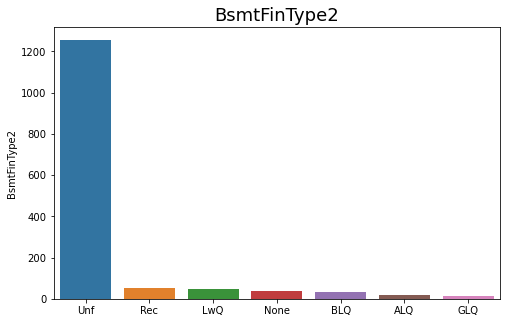

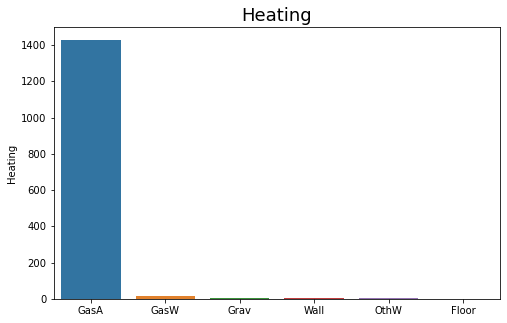

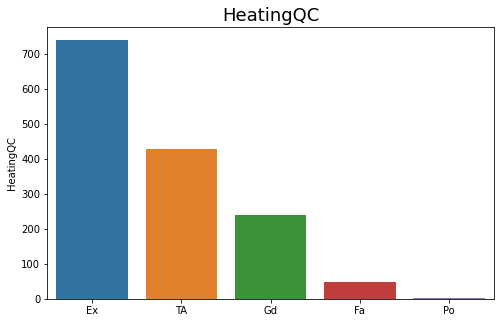

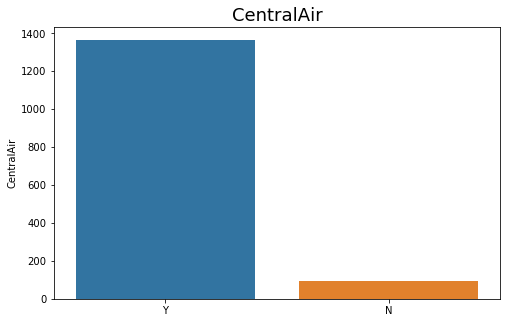

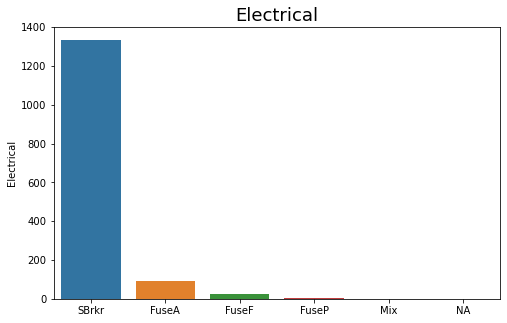

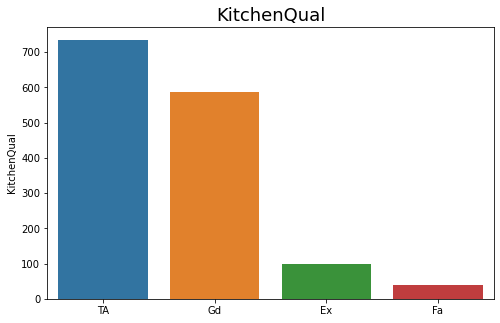

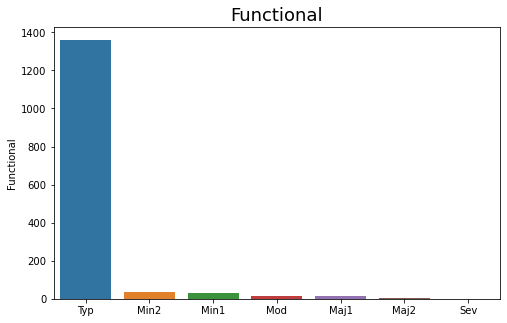

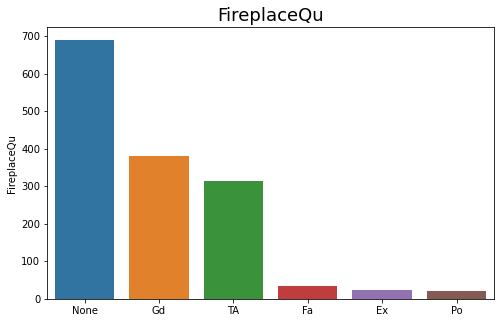

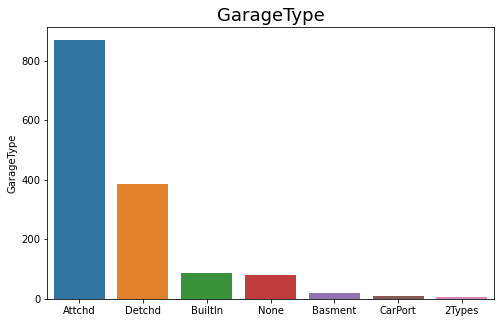

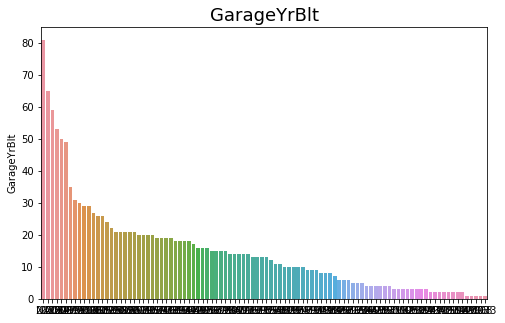

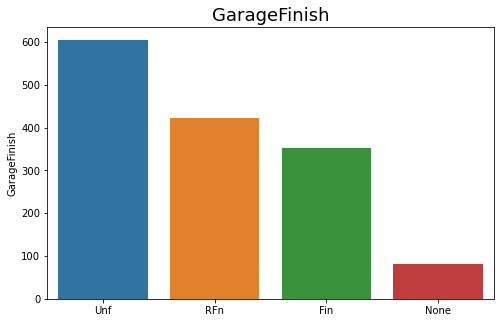

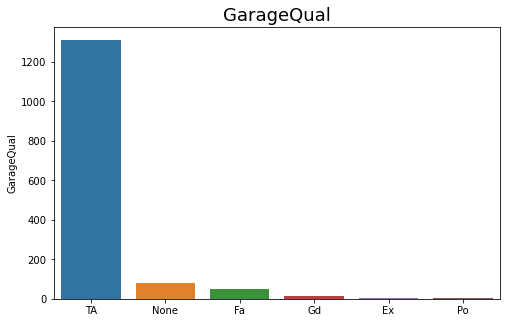

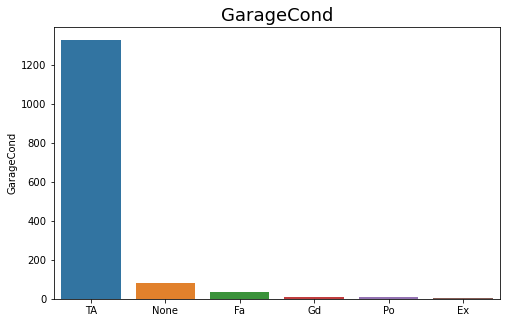

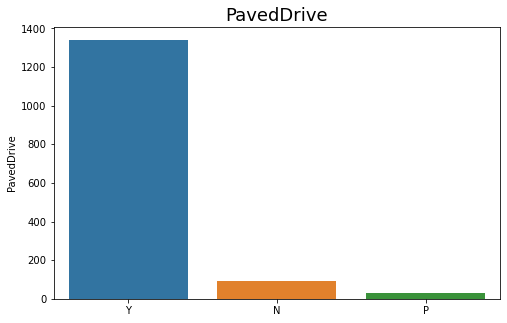

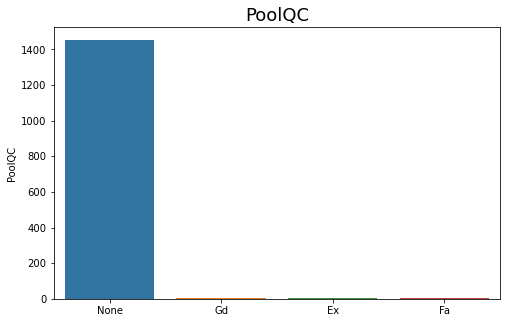

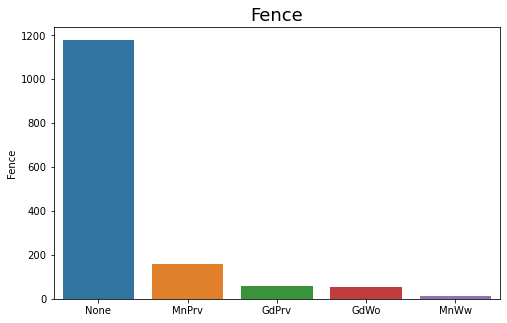

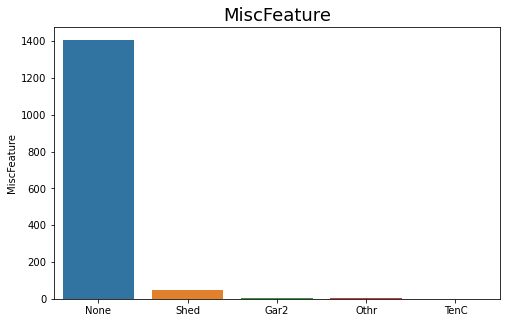

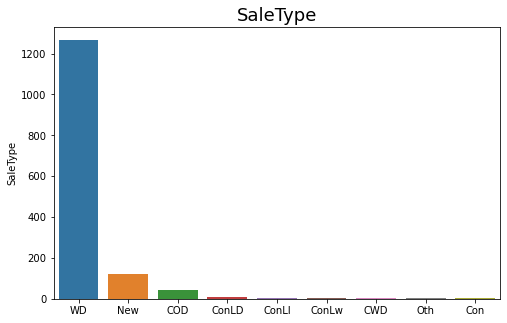

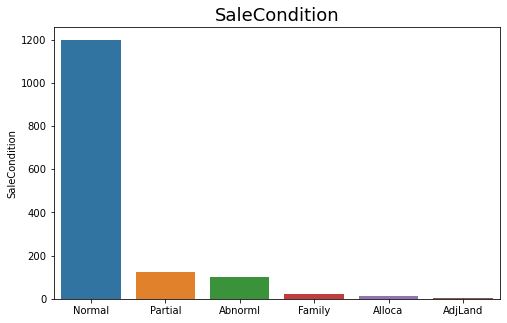

In [25]:
## We visualize the levels of categorical columns using bar plots
for i in housedf_cat.columns:
    plt.figure(figsize=(8,5))
    plt.title(i, fontdict={'fontsize': 18})
    sns.barplot(housedf_cat[i].value_counts().index, housedf_cat[i].value_counts())
    plt.show()

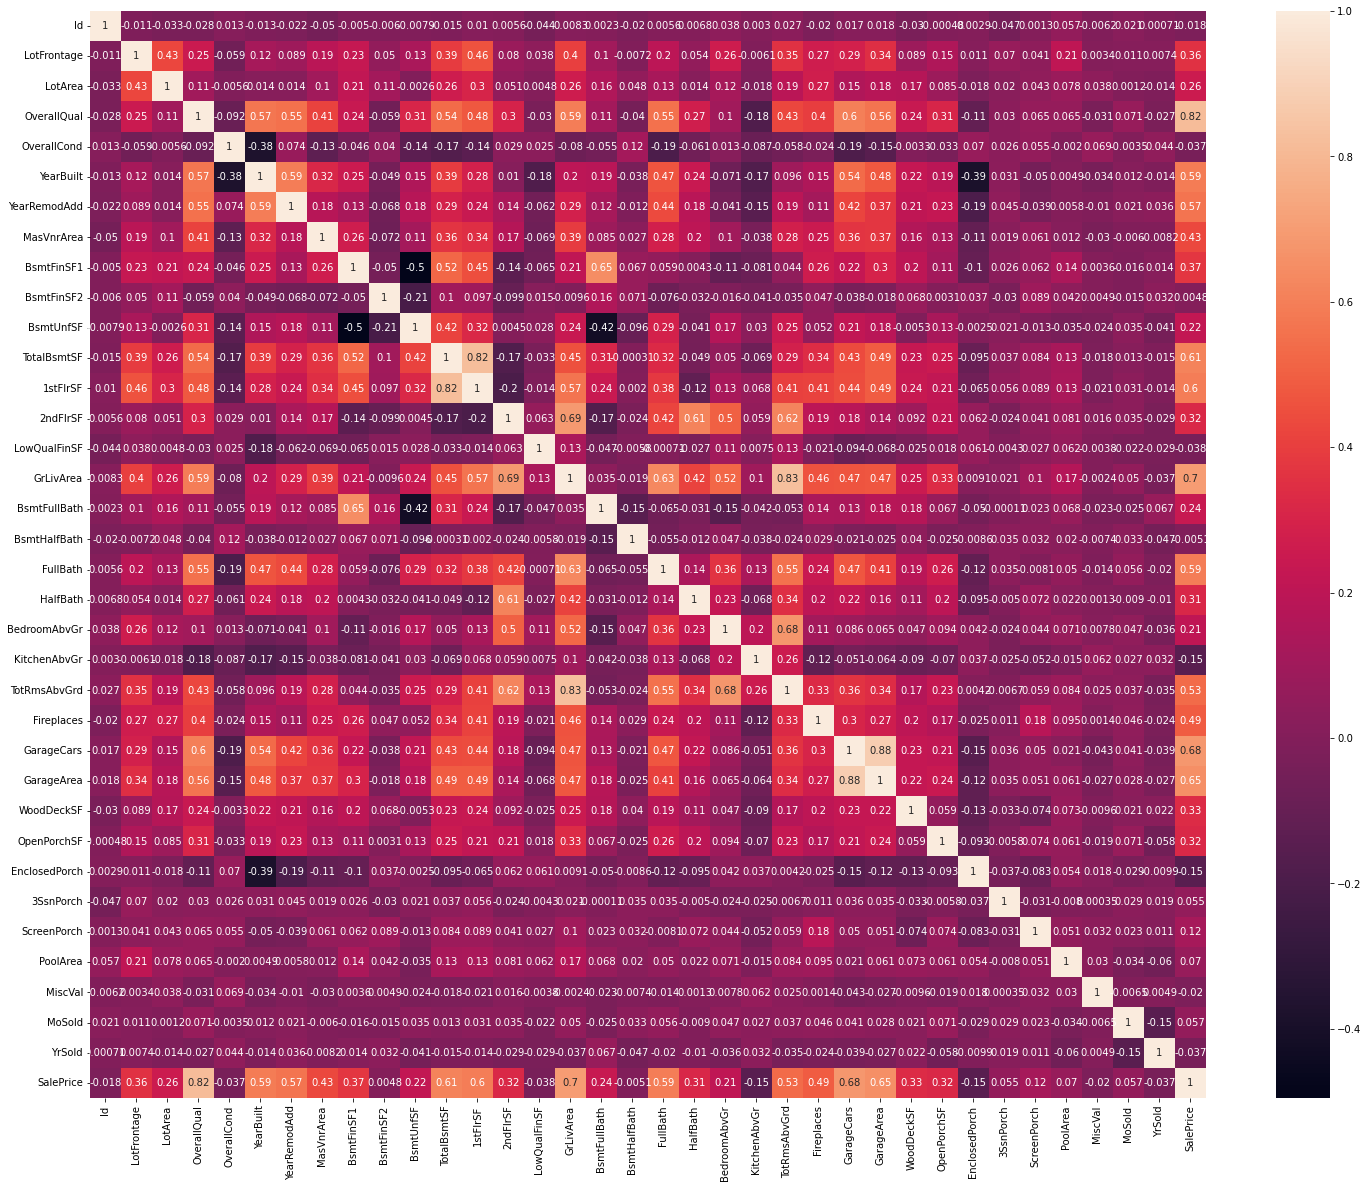

In [26]:
# We plot the heatmap to detect correlations among numerical variables
plt.figure(figsize=(25,20))
sns.heatmap(housedf_num.corr(), annot=True);

- We observe that many columns are highly correlated with each other
- Target variable SalePrice is highly correlated with GarageArea, GarageCars and GrLivArea.

# Feature Engineering

In [27]:
# We create a new column for the age of the house
house_df['Age'] = house_df['YrSold'] - house_df['YearBuilt']

In [28]:
# We drop the two columns from which we created 'Age' column
house_df.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

In [29]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,WD,Normal,12.247694,5
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,WD,Normal,12.109011,31
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,WD,Normal,12.317167,7
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,WD,Abnorml,11.849398,91
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,WD,Normal,12.429216,8


# Missing Value Treatment

In [30]:
## We check the missing values in all columns
house_df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

- There are missing values in two columns LotFrontage and MasVnrArea
- Both of them are numerical columns. We will replace them with mean value

In [31]:
# We replace missing values in the above meniioned columns by their means
house_df['LotFrontage'].fillna(house_df['LotFrontage'].mean(), inplace=True)
house_df['MasVnrArea'].fillna(house_df['MasVnrArea'].mean(), inplace=True)

In [32]:
house_df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

# Dummy Variable Creation

In [33]:
housedf_num = house_df.select_dtypes(include=['int64', 'float64'])
housedf_cat = house_df.select_dtypes(include='object')

In [34]:
housedf_cat_encoded = pd.get_dummies(housedf_cat, drop_first=True)
housedf_cat_encoded.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageYrBlt_1906,GarageYrBlt_1908,GarageYrBlt_1910,GarageYrBlt_1914,GarageYrBlt_1915,GarageYrBlt_1916,GarageYrBlt_1918,GarageYrBlt_1920,GarageYrBlt_1921,GarageYrBlt_1922,GarageYrBlt_1923,GarageYrBlt_1924,GarageYrBlt_1925,GarageYrBlt_1926,GarageYrBlt_1927,GarageYrBlt_1928,GarageYrBlt_1929,GarageYrBlt_1930,GarageYrBlt_1931,GarageYrBlt_1932,GarageYrBlt_1933,GarageYrBlt_1934,GarageYrBlt_1935,GarageYrBlt_1936,GarageYrBlt_1937,GarageYrBlt_1938,GarageYrBlt_1939,GarageYrBlt_1940,GarageYrBlt_1941,GarageYrBlt_1942,GarageYrBlt_1945,GarageYrBlt_1946,GarageYrBlt_1947,GarageYrBlt_1948,GarageYrBlt_1949,GarageYrBlt_1950,GarageYrBlt_1951,GarageYrBlt_1952,GarageYrBlt_1953,GarageYrBlt_1954,Garage

In [35]:
# We check the dimensions
housedf_cat_encoded.shape

(1460, 336)

# Outlier treatment

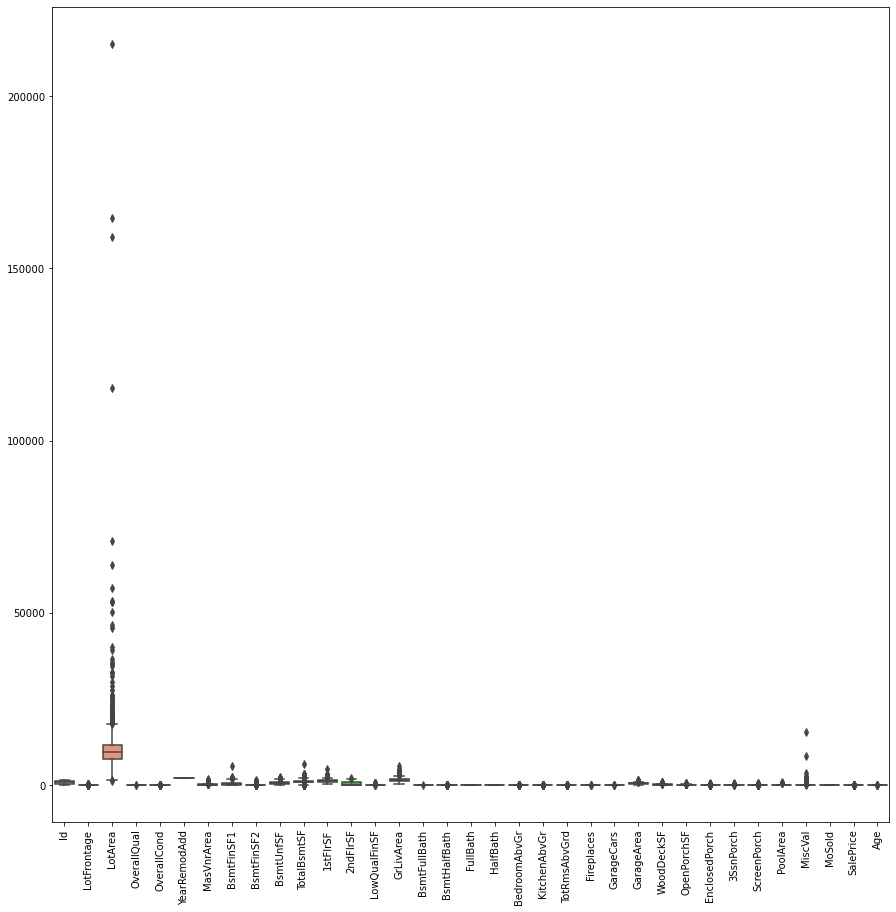

In [36]:
# We check the boxplots to view outliers in numerical columns
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=housedf_num);

In [37]:
# We are capping outliers to 5% as lower limit and 95% as upper limit
for i in housedf_num.columns:
    housedf_num[i][housedf_num[i] <= housedf_num[i].quantile(0.05)] = housedf_num[i].quantile(0.05)
    housedf_num[i][housedf_num[i] >= housedf_num[i].quantile(0.95)] = housedf_num[i].quantile(0.95)

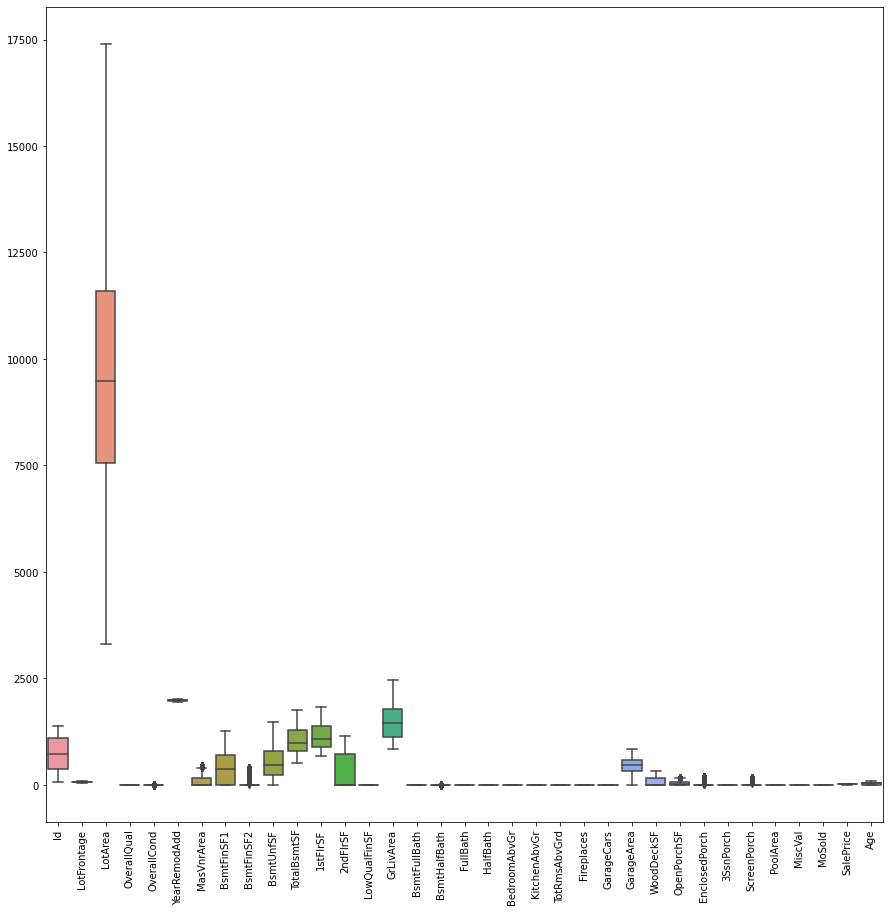

In [38]:
## We verify the boxplots again to see if outliers have been treated
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=housedf_num);

In [39]:
# We concatenate the outlier treated numerical columns with one hot encoded categorical columns
house_df = pd.concat([housedf_num, housedf_cat_encoded], axis=1)

house_df.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageYrBlt_1906,GarageYrBlt_1908,GarageYrBlt_1910,GarageYrBlt_1914,GarageYrBlt_1915,GarageYrBlt_1916,GarageYrBlt_1918,GarageYrBlt_1920,GarageYrBlt_1921,GarageYrBlt_1922,GarageYrBlt_1923,GarageYrBlt_1924,GarageYrBlt_1925,GarageYrBlt_1926,GarageYrBlt_1927,GarageYrBlt_1928,GarageYrBlt_1929,GarageYrBlt_1930,GarageYrBlt

# Model Building

We first split the data into dependent and independent variable

In [40]:
# X contains all independent variables used for making predictions except 'Id' (not useful) and 'SalePrice' (target variable)
X = house_df.drop(["Id", "SalePrice"], axis=1).copy()
X.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageYrBlt_1906,GarageYrBlt_1908,GarageYrBlt_1910,GarageYrBlt_1914,GarageYrBlt_1915,GarageYrBlt_1916,GarageYrBlt_1918,GarageYrBlt_1920,GarageYrBlt_1921,GarageYrBlt_1922,GarageYrBlt_1923,GarageYrBlt_1924,GarageYrBlt_1925,GarageYrBlt_1926,GarageYrBlt_1927,GarageYrBlt_1928,GarageYrBlt_1929,GarageYrBlt_1930,GarageYrBlt_1931,GarageY

In [41]:
# We separate out the target variable as y which we want to predict
y = house_df["SalePrice"].copy()
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [42]:
# Splitting X and y into 70% train data and 30% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [43]:
# We view the dimensions of train data
print(X_train.shape)
print(y_train.shape)

(1022, 369)
(1022,)


In [44]:
## We view the dimensions of test data
print(X_test.shape)
print(y_test.shape)

(438, 369)
(438,)


#### We scale the numerical columns

In [45]:
# We create a list of numerical columns to be scaled
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
print(num_cols)

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'Age']


In [46]:
# We create a scaling instance
scaler = StandardScaler()

# We scale the numerical columns 
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

We define a function for viewing the metrics

In [47]:
def show_metrics(y_train, y_train_pred, y_test, y_pred):
    
    metric = []
    
    # R-squared for train and test data
    print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    metric.append(r2_score(y_train, y_train_pred))
    print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
    metric.append(r2_score(y_test, y_pred))
    
    # Residual sum of squares for train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metric.append(rss_test)
    print("RSS (Train) =", '%.2f' % rss_train)
    print("RSS (Test) =", '%.2f' % rss_test)
    
    # Mean Squared Error for train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metric.append(mse_test)
    print("MSE (Train) =", '%.2f' % mse_train)
    print("MSE (Test) =", '%.2f' % mse_test)
    
    # Root Mean Squared Error for train and test data
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)
    print("RMSE (Train) =", '%.2f' % rmse_train) 
    print("RMSE (Test) =", '%.2f' % rmse_test)
    
    return metric

### Ridge Regression

In [48]:
## For creating the Ridge Regression model
# we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
ridgeCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [49]:
## We check the optimal value of alpha
ridgeCV.best_params_

{'alpha': 10.0}

In [50]:
# We view the results of cross validation search
print(ridgeCV.cv_results_)

{'mean_fit_time': array([0.08979101, 0.08038669, 0.03753667, 0.03860083, 0.03891463,
       0.03572302, 0.03561144, 0.03841777, 0.0448194 , 0.03929067,
       0.0407968 , 0.0370049 , 0.03684869, 0.03757405, 0.03714867,
       0.0355206 , 0.03862329, 0.03779535, 0.03758307, 0.04018364,
       0.04027486, 0.0397501 , 0.03838124, 0.04059734, 0.03596635,
       0.03750882, 0.03800254, 0.03816876]), 'std_fit_time': array([0.00836731, 0.04104337, 0.00092557, 0.00233218, 0.00174805,
       0.00134428, 0.00082823, 0.00277718, 0.0033094 , 0.00159842,
       0.00381911, 0.00167608, 0.00116866, 0.00320399, 0.00166757,
       0.00092172, 0.00256334, 0.00074223, 0.0028644 , 0.00479228,
       0.00439396, 0.00372242, 0.00265132, 0.00523834, 0.00106853,
       0.00417342, 0.00179187, 0.00206488]), 'mean_score_time': array([0.01046896, 0.00820651, 0.00946479, 0.01021037, 0.0098021 ,
       0.00905957, 0.00938501, 0.01053977, 0.01103253, 0.01055489,
       0.01064687, 0.00942912, 0.01033683, 0.00948973

#### We got optimum value of alpha as 10. Now we will build a ridge regression model using this value.

In [51]:
# We create a ridge regreesion instance with optimum value alpha=10
ridge = Ridge(alpha=10)

In [52]:
# We fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [53]:
# We view the coefficients of ridge regression fitted model
print(ridge.coef_)

[ 6.62646338e-03  2.17165478e-02  5.56586341e-02  3.97369508e-02
  1.93550801e-02 -2.99670413e-03  5.27997187e-03 -3.24094674e-03
 -2.29749849e-02  5.54642054e-02  5.71928118e-03  2.64618479e-02
  0.00000000e+00  8.81525078e-02  7.11290091e-03 -1.68082452e-03
  9.81398635e-03  1.07416132e-02  7.10607529e-03  0.00000000e+00
 -2.08229588e-03  1.75397135e-02  2.32942329e-02  1.00985207e-02
  1.27110015e-02  6.86799209e-03  4.59178490e-03  0.00000000e+00
  9.79523077e-03  0.00000000e+00  0.00000000e+00  1.65066257e-03
 -4.97075420e-02 -2.61068522e-02  3.31793936e-03  2.08068875e-03
  1.58271937e-03 -2.42170181e-04  4.06430955e-02  2.79338035e-02
 -5.05403458e-03  4.22178149e-03 -3.23392731e-02 -8.75132398e-04
 -4.67259640e-02 -3.75266539e-03 -2.15269457e-02  3.16014631e-02
  1.03436057e-02  1.75156654e-02 -2.76375313e-02 -7.35568117e-03
 -1.17526951e-02  2.87051509e-02  1.47595334e-02 -2.63452244e-02
 -1.39400229e-03  4.18462505e-02  1.45986453e-02  1.97602682e-02
 -1.33806426e-02  2.22272

In [54]:
# We make the predictions
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [55]:
# We check the metrics
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.94
R-Squared (Test) = 0.93
RSS (Train) = 7.68
RSS (Test) = 4.08
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.09
RMSE (Test) = 0.10


We will plot R2 Scores against different values of alpha for train and test sets

In [56]:
ridgeCV_result= pd.DataFrame(ridgeCV.cv_results_)
print(ridgeCV_result)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.089791      0.008367         0.010469        0.001458      0.0001   
1        0.080387      0.041043         0.008207        0.002159       0.001   
2        0.037537      0.000926         0.009465        0.000779        0.01   
3        0.038601      0.002332         0.010210        0.000752        0.05   
4        0.038915      0.001748         0.009802        0.001169         0.1   
5        0.035723      0.001344         0.009060        0.001114         0.2   
6        0.035611      0.000828         0.009385        0.000499         0.3   
7        0.038418      0.002777         0.010540        0.001016         0.4   
8        0.044819      0.003309         0.011033        0.000646         0.5   
9        0.039291      0.001598         0.010555        0.000502         0.6   
10       0.040797      0.003819         0.010647        0.001584         0.7   
11       0.037005      0.001676         

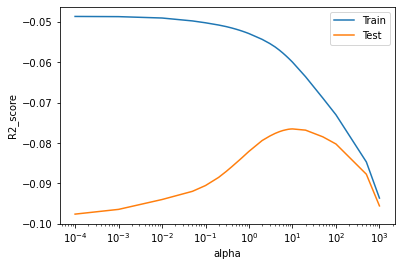

In [57]:
# We plot R2 score vs alpha values
plt.plot(ridgeCV_result['param_alpha'], ridgeCV_result['mean_train_score'], label='Train')
plt.plot(ridgeCV_result['param_alpha'], ridgeCV_result['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

- As the value of alpha increases, we see a decrease in train error.
- As the value of alpha increases, we see an initial increase followed by decrease in test error.
- From graph also, it is apparent that the optimal value of alpha is 10.

### Lasso Regression

In [58]:
# For creating the Lasso Regression model
# we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [59]:
# We view the optimal value of alpha
lassoCV.best_params_

{'alpha': 0.001}

In [60]:
# We view the results of cross validation search
print(lassoCV.cv_results_)

{'mean_fit_time': array([0.55749755, 0.21425209, 0.0667532 , 0.08704262, 0.06217484,
       0.03797369, 0.0287993 , 0.02526612, 0.0276021 , 0.0287322 ,
       0.03075914, 0.02896495, 0.03065372, 0.02729745, 0.02910061,
       0.02448235, 0.02290196, 0.02560058, 0.02502551, 0.02373405,
       0.0247313 , 0.02364688, 0.02292633, 0.02151504, 0.02241855,
       0.02365174, 0.02274103, 0.02274709]), 'std_fit_time': array([0.20364247, 0.093171  , 0.01027479, 0.05017261, 0.01912025,
       0.00790153, 0.00193972, 0.00090959, 0.00049267, 0.00193739,
       0.00307703, 0.00165397, 0.0020075 , 0.00240274, 0.00099688,
       0.00304993, 0.0006654 , 0.00135745, 0.00089457, 0.0012144 ,
       0.00132786, 0.0014312 , 0.00122109, 0.00099681, 0.00170189,
       0.00108223, 0.00085258, 0.00047285]), 'mean_score_time': array([0.01381726, 0.02039094, 0.02944169, 0.01166573, 0.03520141,
       0.01298995, 0.00960464, 0.01064734, 0.00860209, 0.01101565,
       0.0090374 , 0.01287265, 0.01070895, 0.0100843 

#### We got optimum value of alpha as 0.001. Now we will build a lasso regression model using this value.

In [61]:
lasso = Lasso(alpha=0.001)

In [62]:
# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [63]:
# We view the coefficients of lasso fitted model
print(lasso.coef_)

[ 0.00411211  0.02385586  0.07026006  0.04225854  0.01778592 -0.00036269
  0.02029142  0.         -0.00921759  0.04820692 -0.          0.00492705
  0.          0.10333997  0.00796876 -0.          0.00316228  0.00827993
  0.          0.         -0.          0.02194141  0.02632905  0.010948
  0.01248492  0.00615395  0.00389525  0.          0.00975171  0.
  0.          0.         -0.05564062 -0.          0.         -0.
  0.         -0.          0.01765003  0.          0.          0.
 -0.0403036   0.         -0.04135008 -0.         -0.          0.
 -0.          0.         -0.04955729 -0.         -0.          0.0013539
  0.         -0.         -0.00375428  0.01524497  0.         -0.
 -0.          0.01409606 -0.         -0.         -0.          0.
  0.         -0.         -0.          0.03432178  0.01349703 -0.
  0.07004874 -0.02531466 -0.          0.         -0.         -0.
 -0.00636671  0.         -0.          0.          0.02719941 -0.
  0.         -0.         -0.          0.04965909  0.0

In [64]:
# We make the predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [65]:
# We check the metrics
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.92
R-Squared (Test) = 0.93
RSS (Train) = 10.19
RSS (Test) = 4.00
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.10
RMSE (Test) = 0.10


We will plot R2 Scores against different values of alpha for train and test sets

In [66]:

lassoCV_result= pd.DataFrame(lassoCV.cv_results_)
print(lassoCV_result)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.557498      0.203642         0.013817        0.002498      0.0001   
1        0.214252      0.093171         0.020391        0.004598       0.001   
2        0.066753      0.010275         0.029442        0.013666        0.01   
3        0.087043      0.050173         0.011666        0.002070        0.05   
4        0.062175      0.019120         0.035201        0.020013         0.1   
5        0.037974      0.007902         0.012990        0.002611         0.2   
6        0.028799      0.001940         0.009605        0.001016         0.3   
7        0.025266      0.000910         0.010647        0.000932         0.4   
8        0.027602      0.000493         0.008602        0.000497         0.5   
9        0.028732      0.001937         0.011016        0.002179         0.6   
10       0.030759      0.003077         0.009037        0.000158         0.7   
11       0.028965      0.001654         

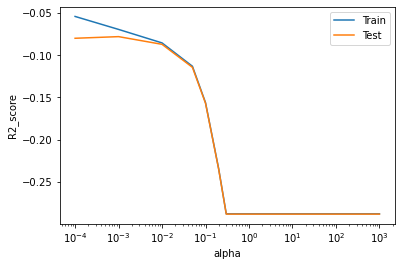

In [67]:
# We plot the R2 score vs alpha values
plt.plot(lassoCV_result['param_alpha'], lassoCV_result['mean_train_score'], label='Train')
plt.plot(lassoCV_result['param_alpha'], lassoCV_result['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

- As the value of alpha increases, we observe a decrease in both train and test error.
- After reaching a value of approximately 0.05, the error remains constant

# Comparison of Ridge and Lasso Regression Models

In [68]:
# We set the floating point display option
pd.options.display.float_format = "{:,.2f}".format

In [69]:
# Creating a table which contain all the metrics

rl_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(rl_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
print(final_metric.set_index('Metric'))

                  Ridge Regression  Lasso Regression
Metric                                              
R2 Score (Train)              0.94              0.92
R2 Score (Test)               0.93              0.93
RSS (Train)                   7.68             10.19
RSS (Test)                    4.08              4.00
MSE (Train)                   0.01              0.01
MSE (Test)                    0.01              0.01
RMSE (Train)                  0.09              0.10
RMSE (Test)                   0.10              0.10


#### The R2 Score on test data is same for both Ridge and Lasso Regression Model (0.93)  

In [70]:
## Now we analyze the changes in coefficients after regularization

## First we create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas

""
LotFrontage
LotArea
OverallQual
OverallCond
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF


In [71]:
## Now we fill in the values of betas for ridge coefficients and lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [72]:
betas

,Ridge,Lasso
LotFrontage,0.01,0.00
LotArea,0.02,0.02
OverallQual,0.06,0.07
OverallCond,0.04,0.04
YearRemodAdd,0.02,0.02
MasVnrArea,-0.00,-0.00
BsmtFinSF1,0.01,0.02
BsmtFinSF2,-0.00,0.00
BsmtUnfSF,-0.02,-0.01
TotalBsmtSF,0.06,0.05


In [73]:
# We view the features removed by Lasso
betas[betas['Lasso']==0]

,Ridge,Lasso
BsmtFinSF2,-0.00,0.00
1stFlrSF,0.01,-0.00
LowQualFinSF,0.00,0.00
BsmtHalfBath,-0.00,-0.00
BedroomAbvGr,0.01,0.00
KitchenAbvGr,0.00,0.00
TotRmsAbvGrd,-0.00,-0.00
3SsnPorch,0.00,0.00
PoolArea,0.00,0.00
MiscVal,0.00,0.00


In [74]:
# We view the number of features removed by lasso
betas[betas['Lasso']==0].shape

(302, 2)

#### We observe that 302 features out of 369 (from X_train) have been removed by Lasso. Hence it performs feature selection


In [75]:
## We look at the features selected by lasso
betas.loc[betas['Lasso']!=0, 'Lasso']

LotFrontage              0.00
LotArea                  0.02
OverallQual              0.07
OverallCond              0.04
YearRemodAdd             0.02
MasVnrArea              -0.00
BsmtFinSF1               0.02
BsmtUnfSF               -0.01
TotalBsmtSF              0.05
2ndFlrSF                 0.00
GrLivArea                0.10
BsmtFullBath             0.01
FullBath                 0.00
HalfBath                 0.01
Fireplaces               0.02
GarageCars               0.03
GarageArea               0.01
WoodDeckSF               0.01
OpenPorchSF              0.01
EnclosedPorch            0.00
ScreenPorch              0.01
Age                     -0.06
MSSubClass_70            0.02
MSSubClass_90           -0.04
MSSubClass_160          -0.04
MSZoning_RM             -0.05
Alley_Pave               0.00
LotShape_Reg            -0.00
LandContour_HLS          0.02
LotConfig_CulDSac        0.01
Neighborhood_BrkSide     0.03
Neighborhood_ClearCr     0.01
Neighborhood_Crawfor     0.07
Neighborho

# Final Conclusion

#### We will look at the top 10 features significant in predicting the value of a house, both according to Ridge model and Lasso model

In [76]:
# We view the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

GrLivArea              0.09
Neighborhood_Crawfor   0.07
Exterior1st_BrkFace    0.07
Functional_Typ         0.06
Condition2_Norm        0.06
SaleCondition_Alloca   0.06
OverallQual            0.06
TotalBsmtSF            0.06
Neighborhood_StoneBr   0.05
Condition1_Norm        0.05
Name: Ridge, dtype: float64

In [77]:
# For interpreting the ridge coefficients in terms of target, we have to take inverse log of betas
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

GrLivArea              1.09
Neighborhood_Crawfor   1.07
Exterior1st_BrkFace    1.07
Functional_Typ         1.06
Condition2_Norm        1.06
SaleCondition_Alloca   1.06
OverallQual            1.06
TotalBsmtSF            1.06
Neighborhood_StoneBr   1.05
Condition1_Norm        1.05
Name: Ridge, dtype: float64

In [78]:
# We view the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

GrLivArea              0.10
Exterior1st_BrkFace    0.07
OverallQual            0.07
Neighborhood_Crawfor   0.07
Functional_Typ         0.06
Neighborhood_Somerst   0.05
TotalBsmtSF            0.05
Condition1_Norm        0.05
OverallCond            0.04
Neighborhood_BrkSide   0.03
Name: Lasso, dtype: float64

In [79]:
# To interpret the lasso coefficients in terms of target, we have to take inverse log  of betas
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

GrLivArea              1.11
Exterior1st_BrkFace    1.08
OverallQual            1.07
Neighborhood_Crawfor   1.07
Functional_Typ         1.06
Neighborhood_Somerst   1.05
TotalBsmtSF            1.05
Condition1_Norm        1.05
OverallCond            1.04
Neighborhood_BrkSide   1.03
Name: Lasso, dtype: float64

#### The R2 Score on test data is same for both Ridge and Lasso Regression (0.93). However since Lasso helps in feature reduction, Lasso has better edge over Ridge Regression Model.

### 1. Which variables are significant in predicting the price of a house

The variables which are significant in predicting the price of a house are listed below
- GrLivArea
- Exterior1st_BrkFace
- OverallQual
- Neighborhood_Crawfor
- Functional_Typ
- Neighborhood_Somerst
- TotalBsmtSF
- Condition1_Norm
- OverallCond
- Neighborhood_BrkSide


### 2. How well those variables describe the price of a house? 

We interpret the lasso coeffiecients in terms of target

In [80]:
lasso_coeffs.sort_values(ascending=False)[:10]

GrLivArea              1.11
Exterior1st_BrkFace    1.08
OverallQual            1.07
Neighborhood_Crawfor   1.07
Functional_Typ         1.06
Neighborhood_Somerst   1.05
TotalBsmtSF            1.05
Condition1_Norm        1.05
OverallCond            1.04
Neighborhood_BrkSide   1.03
Name: Lasso, dtype: float64

From the above table we can see that
- With an increase of 1 square foot of house area above ground, the price will increase by 1.11 times when all the other features remain constant
- if the exterior covering on the house is Brick Face, the price of house will increase by 1.08 times when all the other features remain constant.
<br><br>
In the similar manner we can elaborate on the remaining variables mentioned in the table

### 3. Determine the optimal value of lambda for ridge and lasso regression 

- the optimal value of lambda for Ridge Regression is 10
- the optimal value of lambda for Lasso Regression is 0.001

# Subjective Questions

### 1. What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

- the optimal value of alpha for Ridge Regression is 10
- the optimal value of alpha for Lasso Regression is 0.001

In [81]:
# We build the ridge regression model with double value of alpha i.e. 20
ridge = Ridge(alpha=20)

# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=20)

In [82]:
# We make predictions
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [83]:
# We check metrics
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.93
R-Squared (Test) = 0.93
RSS (Train) = 8.41
RSS (Test) = 3.93
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.09
RMSE (Test) = 0.09


In [84]:
## We build the lasso model with double value of alpha i.e. 0.002
lasso = Lasso(alpha=0.002)

# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.002)

In [85]:
# We make predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [86]:
# We check metrics
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.91
R-Squared (Test) = 0.92
RSS (Train) = 11.64
RSS (Test) = 4.42
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.11
RMSE (Test) = 0.10


In [87]:


rl_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(rl_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

,Ridge Regression,Lasso Regression
Metric,,
R2 Score (Train),0.93,0.91
R2 Score (Test),0.93,0.92
RSS (Train),8.41,11.64
RSS (Test),3.93,4.42
MSE (Train),0.01,0.01
MSE (Test),0.01,0.01
RMSE (Train),0.09,0.11
RMSE (Test),0.09,0.10


#### Changes in Ridge Regression Metrics
- R2 score for train set decreased from 0.94 to 0.93
- R2 score for test set remained same at 0.93

#### Changes in Lasso Regression Metrics
- R2 score for train set decreased from 0.92 to 0.91
- R2 score for test set decreased from 0.93 to 0.92

In [88]:
# We look at the changes in coefficients after regularization

## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas

""
LotFrontage
LotArea
OverallQual
OverallCond
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF


In [89]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [90]:
# We view the betas/coefficients
betas 

,Ridge,Lasso
LotFrontage,0.01,0.00
LotArea,0.02,0.03
OverallQual,0.06,0.08
OverallCond,0.04,0.04
YearRemodAdd,0.02,0.02
MasVnrArea,-0.00,-0.00
BsmtFinSF1,0.01,0.03
BsmtFinSF2,-0.00,0.00
BsmtUnfSF,-0.01,-0.00
TotalBsmtSF,0.05,0.04


#### Now we look at the top 10 coefficients  of Ridge regression in descending order

In [91]:
betas['Ridge'].sort_values(ascending=False)[:10]

GrLivArea              0.08
OverallQual            0.06
Neighborhood_Crawfor   0.06
Exterior1st_BrkFace    0.05
Functional_Typ         0.05
TotalBsmtSF            0.05
Condition1_Norm        0.04
OverallCond            0.04
Condition2_Norm        0.04
CentralAir_Y           0.03
Name: Ridge, dtype: float64

In [92]:
## For interpreting the ridge coefficients in terms of target, we have to take inverse log  of betas
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

GrLivArea              1.08
OverallQual            1.06
Neighborhood_Crawfor   1.06
Exterior1st_BrkFace    1.05
Functional_Typ         1.05
TotalBsmtSF            1.05
Condition1_Norm        1.04
OverallCond            1.04
Condition2_Norm        1.04
CentralAir_Y           1.03
Name: Ridge, dtype: float64

In [93]:
## We look at the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

GrLivArea              0.10
OverallQual            0.08
Neighborhood_Crawfor   0.04
OverallCond            0.04
Functional_Typ         0.04
TotalBsmtSF            0.04
Condition1_Norm        0.04
Foundation_PConc       0.04
Exterior1st_BrkFace    0.04
BsmtFinSF1             0.03
Name: Lasso, dtype: float64

In [94]:
## For interpreting the lasso coefficients in terms of target, we have to take inverse log of betas
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

GrLivArea              1.11
OverallQual            1.08
Neighborhood_Crawfor   1.05
OverallCond            1.04
Functional_Typ         1.04
TotalBsmtSF            1.04
Condition1_Norm        1.04
Foundation_PConc       1.04
Exterior1st_BrkFace    1.04
BsmtFinSF1             1.03
Name: Lasso, dtype: float64

For Ridge Regression Model the most important predictor variables are
- GrLivArea
- OverallQual
- Neighborhood_Crawfor
- Exterior1st_BrkFace
- Functional_Typ
- TotalBsmtSF
- Condition1_Norm 
- OverallCond
- Condition2_Norm
- CentralAir_Y

For Lasso Regression Model the most important predictor variables are
- GrLivArea
- OverallQual
- Neighborhood_Crawfor
- OverallCond
- Functional_Typ
- TotalBsmtSF
- Condition1_Norm
- Foundation_PConc
- Exterior1st_BrkFace
- BsmtFinSF1

### 3. After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

We will drop the top 5 features in Lasso model and build the model again

In [95]:
## We create a list of top 5 lasso predictors that are to be removed
top5 = ['GrLivArea', 'Exterior1st_BrkFace', 'OverallQual', 'Neighborhood_Crawfor', 'Functional_Typ']

In [96]:
## We drop them from train and test data
X_train_dropped = X_train.drop(top5, axis=1)
X_test_dropped = X_test.drop(top5, axis=1)

In [97]:
## For creating a Lasso model
## we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train_dropped, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [98]:
## We view the optimal value of alpha
lassoCV.best_params_

{'alpha': 0.001}

#### we get optimum value of alpha as 0.001. Now we will build a lasso regression model using this value.

In [99]:
# We create a lasso instance with optimum value alpha=0.001
lasso = Lasso(alpha=0.001)

In [100]:
# Fit the model on training data
lasso.fit(X_train_dropped, y_train)

Lasso(alpha=0.001)

In [101]:
## We make predictions
y_train_pred = lasso.predict(X_train_dropped)
y_pred = lasso.predict(X_test_dropped)

In [102]:
# We check metrics
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.91
R-Squared (Test) = 0.92
RSS (Train) = 11.82
RSS (Test) = 4.53
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.11
RMSE (Test) = 0.10


In [103]:
# Creating a table which contain all the metrics

rl_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(rl_table, columns = ['Metric', 'Lasso Regression'] )
final_metric.set_index('Metric')

,Lasso Regression
Metric,
R2 Score (Train),0.91
R2 Score (Test),0.92
RSS (Train),11.82
RSS (Test),4.53
MSE (Train),0.01
MSE (Test),0.01
RMSE (Train),0.11
RMSE (Test),0.10


In [104]:
## we look at the changes in coefficients after regularization

## We create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X_train_dropped.columns)
betas.rows = X_train_dropped.columns
betas

""
LotFrontage
LotArea
OverallCond
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF


In [105]:
betas['Lasso'] = lasso.coef_
betas 

,Lasso
LotFrontage,0.01
LotArea,0.02
OverallCond,0.05
YearRemodAdd,0.01
MasVnrArea,0.00
BsmtFinSF1,0.02
BsmtFinSF2,0.00
BsmtUnfSF,-0.00
TotalBsmtSF,0.05
1stFlrSF,0.07


In [106]:
## We view the top 5 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:5]

2ndFlrSF               0.11
MSSubClass_70          0.08
1stFlrSF               0.07
Neighborhood_Somerst   0.06
Neighborhood_StoneBr   0.06
Name: Lasso, dtype: float64

In [107]:
## For interpreting the lasso coefficients in terms of target, we have to take inverse log of betas
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:5]

2ndFlrSF               1.12
MSSubClass_70          1.08
1stFlrSF               1.08
Neighborhood_Somerst   1.06
Neighborhood_StoneBr   1.06
Name: Lasso, dtype: float64

#### Hence after dropping the top lasso predictors, we get the following new top 5 predictors
- 2ndFlrSF
- MSSubClass_70
- 1stFlrSF
- Neighborhood_Somerst
- Neighborhood_StoneBr